# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 6</center>

# <center>Linear Regression for Supervised Learning</center>

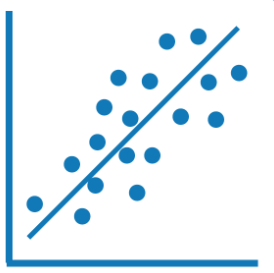

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading Data </li>
<li> Creating Simple Linear Model</li>
<li> Explore Linear Model attributes</li>
<li> Find MSE </li>
<li> Make Predictions for simple linear model</li>
<li> Create Multiple Linear Model </li>
<li> Make Predictions for multiple linear model</li>
</ol>

## <font color = blue>0. Learning Objectives

Use sklearn library to create first machine learning model and implement sklearn LinearRegression model for both univariate and mulitple features.

By the end of the lab, you should be able to :
- Load required dataset and library for training machine learning model


- Implement sklearn LinearRegression algorithm for simple linear model as well as multiple linear model.


- Find MSE for the created model


- Make prediction for unseen data

## <font color = blue>1. Loading Data

    - Load boston housing data from sklearn.datasets module. Create dataframe from the boston data.

In [26]:
#solution
from sklearn.datasets import load_boston

boston = load_boston()
boston.keys()
# print(boston.DESCR)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [27]:
import pandas as pd
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [32]:
df['target'] = boston.target #adding column
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

## <font color = blue>2. Creating simple Linear Model

INSTRUCTIONS:-
    
- The boston dataset contain many features. To implement simple linear regression model, let us choose any one feature that is mostly related to the target feature. 
    
    
- Use dataframe `corr()` method to check correlation between each features with target feature. Use heatmap to display the correlation.
    
    
- Which feature is mostly related to the target feature? Choose that feature to create linear Model.
    
    
- Import `LinearRegression()` from sklearn `linear_model` module. Create LinearRegression() object and fit the dataset to train the model


<AxesSubplot:>

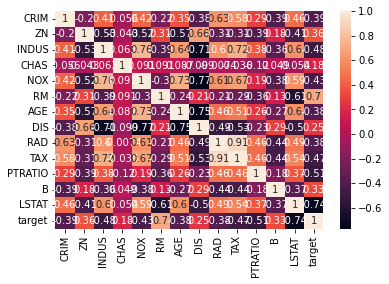

In [29]:
#Solution
import seaborn as sns
df.corr()
sns.heatmap(df.corr(), annot=True)



In [35]:
# create feature X
import numpy as np
# X = np.array(df.RM).reshape(-1,1)
X= df[['RM']]
y= df.target
X

RM
0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
..     ...
501  6.593
502  6.120
503  6.976
504  6.794
505  6.030

[506 rows x 1 columns]

In [36]:
# create linear model
from sklearn.linear_model import LinearRegression
# create linear regression model
lr = LinearRegression() #lr is the model

# Train model using fit
lr.fit(X,y)

LinearRegression()

## <font color = blue>3. Explore Linear Model attributes


In [37]:
#use coef_ attributes to get weights. We have only one weights since it is simple linear model
lr.coef_


array([9.10210898])

In [39]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [38]:
#use intercept_ attributes to get the bias value
lr.intercept_


-34.67062077643857

In [41]:
y_hat = lr.coef_*df.RM[0]+lr.intercept_
y_hat - df.target[0] #sklearn(predict) does all the calculation 

array([1.17574577])

## <font color = blue>4. Find MSE
- sklearn provides `mean_squared_error()` method to check MSE for a given model. `mean_squared_error()` expect y_prediction and actual y value as its paramters. use linear model's `predict()` method to get y_prediction.
    
 `sklearn.metrics.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)`

In [44]:
#creating y_pred
from sklearn.metrics import mean_squared_error
y_pred = lr.predict(X)
MSE = mean_squared_error(y_pred, y)
MSE

43.60055177116956

## <font color = blue>5. Make Predictions


In [46]:
#Use predict method to make prediction to unseen data
x_sample = [[6],[7]]
lr.predict(x_sample)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.94203311, 29.04414209])

## <font color = blue>6. Create Multiple Linear Regression Model

- Explore the Multiple Linear regression model choosing any number of features you are comfortable with. Remember you can use the same LinearRegression() algorithm.

In [49]:
mX = df[['RM','PTRATIO','LSTAT']]
mX

RM  PTRATIO  LSTAT
0    6.575     15.3   4.98
1    6.421     17.8   9.14
2    7.185     17.8   4.03
3    6.998     18.7   2.94
4    7.147     18.7   5.33
..     ...      ...    ...
501  6.593     21.0   9.67
502  6.120     21.0   9.08
503  6.976     21.0   5.64
504  6.794     21.0   6.48
505  6.030     21.0   7.88

[506 rows x 3 columns]

In [51]:
# create multiple linear regression model
mlr = LinearRegression() #lr is the model

# Train model using fit
mlr.fit(mX,y)

LinearRegression()

In [53]:
mlr.coef_

array([ 4.51542094, -0.93072256, -0.57180569])

In [58]:
from sklearn.metrics import mean_squared_error
y_pred = mlr.predict(mX)
MSE = mean_squared_error(y_pred, y)
MSE

27.13040575849706

## <font color = blue>7. Make Prediction for Multi linear Model


In [61]:
#Solution
mx_sample = [[6,15,5]]
mlr.predict(mx_sample)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([28.8397704])

# TODO/HOMEWORK : Creating Linear Model
- Create multiple Linear Regression model with the same features you chose in subtask 6 above. Use any feature scaling techniques to scale the features and train the model. 


- Explore the difference in the result when using unscaled and scaled features.

In [62]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
cdf = scaler.fit_transform(df)
cdf = pd.DataFrame(cdf, columns = df.columns)
cdf.head()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

        DIS       RAD       TAX   PTRATIO         B     LSTAT    target  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503

In [65]:
mlr2 = LinearRegression()
mXi = cdf[['RM', 'PTRATIO', 'LSTAT']]
y_2 = cdf.target
mlr2.fit(mX,y)

LinearRegression()

In [66]:
from sklearn.metrics import mean_squared_error
y_pred = mlr2.predict(mXi)
MSE = mean_squared_error(y_pred, y_2)
MSE

365.80718752926265